<h1>EBTEL Two-Fluid Equations: Collisional Frequency and the Coulomb Logarithm<h1\>

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as astro_const
from matplotlib.colors import LogNorm
%matplotlib inline

In the pressure equations for electrons and ions, there is a collisional term of the form $$\frac{1}{\gamma-1}k_Bn\nu_{ei}(T_i - T_e)$$ where $$\nu_{ei} = \frac{16}{3}\sqrt{\pi}\frac{e^4}{m_em_i}\left(\frac{2k_BT_e}{m_e}\right)^{-3/2}n\ln\Lambda$$ is the collisional frequency.

<p>Define vectors for density and electron temperature</p>

In [125]:
n = np.linspace(10**5,10**10,100)
Te = np.linspace(0.5*10**6,5*10**7,100)
Ti = np.linspace(10**5,5.*10**6,100)

<p>First, do some abundance calculations to factor in influence of heavier elements (i.e. He) in the plasma.<p>

In [126]:
#Define important constants here
kb = astro_const.k_B.cgs.value
mp = astro_const.m_p.cgs.value
me = astro_const.m_e.cgs.value
qe = astro_const.e.gauss.value
abund = 0.075
Z = (1. + 2.*abund)/(1. + abund)
kb_fact = 1./2.*(1. + 1./Z)
mp_fact = (1. + 4.*abund)/(2.+3.*abund)
mu = mp_fact*(1./Z + 1.)
mp = mp*mu
kb = kb*kb_fact
print mu

1.13043478261


<p>Define a function for the Coulomb logarithm. The first function uses that taken from the NRL plasma formulary while the second uses a form taken from <em>Plasma Dyanmics</em> by R.O. Dendy.</p>

In [127]:
def colLog(Te,Ti,n):
    #Define electron and proton mass
    
    #Define the upper and lower temperature limits
    Tup = Z*10.**2
    Tdown = Ti*me/mp
    
    #Decide which function to use
    if Te >= Tup:
        lnLambda = 24 - np.log(sqrt(n)/Te)
    elif Te >= Tdown:
        lnLambda = 23 - np.log(np.sqrt(n)*Z*Te**(-3./2.))
    else:
        lnLambda = 30 - np.log(np.sqrt(n)*Ti**(-3./2.)*Z**2./mu)
        
    return lnLambda
        

In [128]:
def colLog_dendy(Te,n):
    #Define necessary constants
    beta_1 = 1e+13
    beta_2 = 1.602*1e-9
    lnLambda = 18 - np.log((n/beta_1)**(1./2.)*(kb*Te/beta_2)**(-3./2.))
    
    return lnLambda

In [129]:
def colLog_mja(Te,n):
    #Define necessary constants
    beta_1 = 1.e+13
    beta_2 = 1.602*1e-9
    #lnLambda = 23 - log((n/beta_1)**(1./2.)*(kb*Te/beta_2)**(-3./2.))
    lnLambda = np.log(8.*10**6*Te*n**(-1./2.))
    
    return lnLambda

<p>Let's create some surface plots of the Coulomb logarithm to help visualize it</p>

In [130]:
#Set the ion temperature
Ti =0.5*10.**5

In [131]:
cLog = np.zeros((len(n),len(Te)))
for i in range(len(n)):
    for j in range(len(Te)):
        cLog[i,j] = colLog_dendy(Te[j],n[i])
        #cLog[i,j] = colLog(Te[j],Ti[i],n)
        #cLog[i,j] = colLog_mja(Te[j],n[i])

In [132]:
#Make meshgrid from n,Te vectors
n_mesh,Te_mesh = np.meshgrid(n,Te)

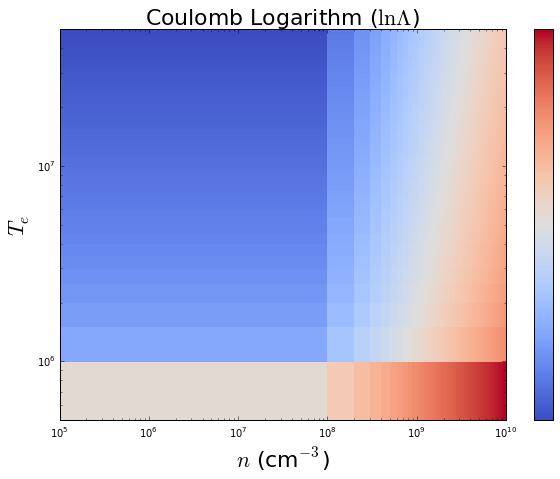

In [134]:
#Now do the plotting
fig=plt.figure(figsize=(10,7),dpi=1000)
ax = fig.gca()
surf = ax.pcolormesh(n_mesh,Te_mesh,cLog,cmap=plt.cm.coolwarm,norm=LogNorm())
ax.set_xlabel(r'$n$ (cm$^{-3}$)',fontsize=22)
ax.set_ylabel(r'$T_e$',fontsize=22)
ax.set_title(r"Coulomb Logarithm ($\ln\Lambda$)",fontsize=22)
ax.set_xlim([np.min(n_mesh),np.max(n_mesh)])
ax.set_ylim([np.min(Te_mesh),np.max(Te_mesh)])
ax.set_xscale('log')
ax.set_yscale('log')
fig.colorbar(surf,ax=ax)
plt.show()

<p>Now define the function for the collisional frequency</p>

In [135]:
def colFreq(Te,Ti,n):  
    #lnLambda = colLog(Te,Ti,n)
    lnLambda = colLog_dendy(Te,n)
    
    nu = 16./3.*np.sqrt(np.pi)*qe**4/me/mp*(2*kb*Te/me)**(-1.5)*n*lnLambda
    
    return nu

In [136]:
#Calculate the collisional frequency for each n,Te
nu_ei = np.zeros((len(n),len(Te)))
for i in range(len(n)):
    for j in range(len(Te)):
        nu_ei[i,j] = colFreq(Te[j],Ti,n[i]) 
        

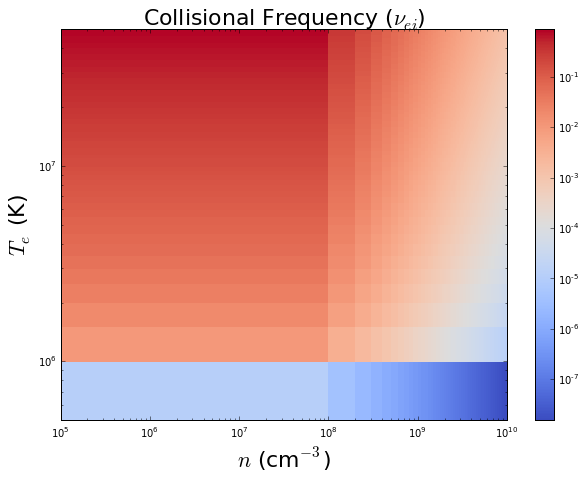

In [137]:
#Now do the plotting
fig=plt.figure(figsize=(10,7),dpi=1000)
ax = fig.gca()
surf = ax.pcolormesh(n_mesh,Te_mesh,nu_ei,cmap=plt.cm.coolwarm,norm=LogNorm())
ax.set_xlabel(r'$n$ (cm$^{-3}$)',fontsize=22)
ax.set_ylabel(r'$T_e$ (K)',fontsize=22)
ax.set_title(r"Collisional Frequency ($\nu_{ei}$)",fontsize=22)
ax.set_xlim([np.min(n_mesh),np.max(n_mesh)])
ax.set_ylim([np.min(Te_mesh),np.max(Te_mesh)])
ax.set_xscale('log')
ax.set_yscale('log')
fig.colorbar(surf,ax=ax)
plt.show()